# **3. Import Dependencies**

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

sns.set()

# **4. Getting The Data**

In [3]:
# load the data
raw_data = pd.read_csv('/kaggle/input/big-mart-sales-prediction-datasets/train.csv')

# **5. Exploring The Data To Gain Insights**

In [4]:
# number of datapoints and features
raw_data.shape

(8523, 12)

In [5]:
# how the data looks like
raw_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [6]:
# check general info and dtypes
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [7]:
# get statistics from the data
raw_data.describe(include='all')

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,8523,7060.000000,8523,8523.000000,8523,8523.000000,8523,8523.000000,6113,8523,8523,8523.000000
unique,1559,NaN,5,NaN,16,NaN,10,NaN,3,3,4,NaN
top,FDW13,NaN,Low Fat,NaN,Fruits and Vegetables,NaN,OUT027,NaN,Medium,Tier 3,Supermarket Type1,NaN
freq,10,NaN,5089,NaN,1232,NaN,935,NaN,2793,3350,5577,NaN
mean,NaN,12.857645,NaN,0.066132,NaN,140.992782,NaN,1997.831867,NaN,NaN,NaN,2181.288914
std,NaN,4.643456,NaN,0.051598,NaN,62.275067,NaN,8.371760,NaN,NaN,NaN,1706.499616
min,NaN,4.555000,NaN,0.000000,NaN,31.290000,NaN,1985.000000,NaN,NaN,NaN,33.290000
25%,NaN,8.773750,NaN,0.026989,NaN,93.826500,NaN,1987.000000,NaN,NaN,NaN,834.247400
50%,NaN,12.600000,NaN,0.053931,NaN,143.012800,NaN,1999.000000,NaN,NaN,NaN,1794.331000
75%,NaN,16.850000,NaN,0.094585,NaN,185.643700,NaN,2004.000000,NaN,NaN,NaN,3101.296400


In [8]:
# verify null values
raw_data.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [9]:
# check for duplicated rows
raw_data.duplicated().any()

False

In [10]:
# verify unique values
raw_data.apply(lambda x: len(x.unique()))

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     4
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [11]:
# getting categorical and numerical columns
cat_cols = raw_data.select_dtypes(exclude='number').columns.to_list()
num_cols = raw_data.select_dtypes(include='number').columns.to_list()

print('Categorical Columns: ', cat_cols)
print('Numerical Columns: ', num_cols)

Categorical Columns:  ['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
Numerical Columns:  ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year', 'Item_Outlet_Sales']


In [12]:
# exploring categories
for col in cat_cols:
    print('-----------------------------')
    print('Series: ', col)
    print('-----------------------------')
    print(raw_data[col].value_counts())
    print('\n')

-----------------------------
Series:  Item_Identifier
-----------------------------
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64


-----------------------------
Series:  Item_Fat_Content
-----------------------------
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64


-----------------------------
Series:  Item_Type
-----------------------------
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 1

## **Notes:**
* The dataset 8523 contains datapoints _(rows)_ and 12 features _(columns)_.
* The dataset is for 1559 items in 10 different stores.
* There are present categorical _(object)_ and numerical features _(float, int)_.
* The target is the _'Item_Outlet_Sales'_ feature.
* Some features presents null values and outliers.
* There are no duplicate rows.

**_Item_Identifier:_**
* Ids for 1559 different items.
* The ids has some prefixes: FD=Food, DR=Drink, NC=Non-Consumable.

**_Item_Weight:_**
* It contains null values.

**_Item_Fat_Content:_**
* It has 5 different categories, but some of them do reference to an existing category, it can be summarized to two categories: _Low Fat_ and _Regular_.
* This feature do not apply to Non-Consumable items, a new category for them can be created.

**_Item_Visibility:_**
* Some values are 0%, an item can not be bought by a consumer if its not visible, this is an outlier.

**_Item_Type:_**
* There are 16 different item types, the data is not well distributed among all of them.
* The model can be biased towards the most repetitive types: Fruits and Vegetables and Snack Foods.

**_Outlet_Identifier:_**
* There are 10 different outlet ids.
* The data seems to be pretty well distributed among all the outlets.

**_Outlet_Size:_**
* It has null values.
* The data is not well distributed among the different sizes.
* The _Oulet_Size_ has some relation with the _Oulet_Type_ that need to be considered when the null values be filled.

**_Outlet_Location_Type and Outlet_Type:_**
* The data is not well distributed among the different sizes.
* The model can be biased towards the most repetitive types.

# **6. Cleaning The Data And Create New Features**

In [13]:
# make a copy of the data
clean_data = raw_data.copy()

In [14]:
# format column names to be lower-case
new_col_names = [col.lower() for col in clean_data.columns]
clean_data.columns = new_col_names

print(clean_data.columns)

Index(['item_identifier', 'item_weight', 'item_fat_content', 'item_visibility',
       'item_type', 'item_mrp', 'outlet_identifier',
       'outlet_establishment_year', 'outlet_size', 'outlet_location_type',
       'outlet_type', 'item_outlet_sales'],
      dtype='object')


## **6.1. Filling _'item_weight'_ null values**

In [15]:
# fill null values using the mean
clean_data['item_weight'].fillna(clean_data['item_weight'].mean(), inplace=True)
clean_data.isna().sum()

item_identifier                 0
item_weight                     0
item_fat_content                0
item_visibility                 0
item_type                       0
item_mrp                        0
outlet_identifier               0
outlet_establishment_year       0
outlet_size                  2410
outlet_location_type            0
outlet_type                     0
item_outlet_sales               0
dtype: int64

## **6.2. Filling _'outlet_size'_ null values**

In [16]:
# getting mode based on outlet_type
outlet_size_mode_pt = clean_data.pivot_table(values='outlet_size',
                                                      columns='outlet_type',
                                                      aggfunc=lambda x: x.mode())
outlet_size_mode_pt

outlet_type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
outlet_size,Small,Small,Medium,Medium


In [17]:
# fill null values using the mode per oulet_type
missing_values = clean_data['outlet_size'].isnull()
clean_data.loc[missing_values, 'outlet_size'] = clean_data.loc[missing_values, 'outlet_type'].apply(lambda x: outlet_size_mode_pt[x].outlet_size)
clean_data.isna().sum()

item_identifier              0
item_weight                  0
item_fat_content             0
item_visibility              0
item_type                    0
item_mrp                     0
outlet_identifier            0
outlet_establishment_year    0
outlet_size                  0
outlet_location_type         0
outlet_type                  0
item_outlet_sales            0
dtype: int64

## **6.3. Replace _'item_visibility'_ 0%**

In [18]:
# print total number of 0s
print('Total of 0s before replace: ', sum(clean_data['item_visibility'] == 0))

# replace 0s with the mean
clean_data.loc[:,'item_visibility'].replace(to_replace=0,
                                            value=clean_data['item_visibility'].mean(),
                                            inplace=True)

# print total number of 0s after the replace
print('Total of 0s after replace: ', sum(clean_data['item_visibility'] == 0))

Total of 0s before replace:  526
Total of 0s after replace:  0


## **6.4. Replace _'item_fat_content'_ values**

In [19]:
# print values
print(clean_data['item_fat_content'].unique())

['Low Fat' 'Regular' 'low fat' 'LF' 'reg']


In [20]:
# replace the repetitive values
clean_data['item_fat_content'].replace({'low fat':'Low Fat', 'LF':'Low Fat', 'reg':'Regular'}, inplace=True)
clean_data['item_fat_content'].value_counts()

Low Fat    5517
Regular    3006
Name: item_fat_content, dtype: int64

## **6.5. Create a new 'item_category' feature**

In [21]:
# create a new feature using the two first letters of the item_identifier
clean_data['item_category'] = clean_data['item_identifier'].apply(lambda x: x[:2])
clean_data['item_category'] = clean_data['item_category'].replace({'FD':'Food', 'DR':'Drink', 'NC':'Non-Consumable'})
clean_data['item_category'].value_counts()

Food              6125
Non-Consumable    1599
Drink              799
Name: item_category, dtype: int64

## **6.6. Update _'item_fat_content'_ for Non-Consumables**

In [22]:
# adding a new item item_fat_content category for non-consumable items
clean_data.loc[clean_data['item_category'] == 'Non-Consumable', 'item_fat_content'] = 'No Edible'
clean_data['item_fat_content'].value_counts()

Low Fat      3918
Regular      3006
No Edible    1599
Name: item_fat_content, dtype: int64

## **6.7. Create a new _'outlet_years'_ feature**

In [23]:
# the new feature tell us how old is the outlet
clean_data['outlet_years'] = 2013 - clean_data['outlet_establishment_year']
clean_data['outlet_years']

0       14
1        4
2       14
3       15
4       26
        ..
8518    26
8519    11
8520     9
8521     4
8522    16
Name: outlet_years, Length: 8523, dtype: int64

# **7. Analyze And Visualize The Data**

In [24]:
# how the data looks like
clean_data.head()

,item_identifier,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_identifier,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,item_outlet_sales,item_category,outlet_years
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Food,14
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Drink,4
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Food,14
3,FDX07,19.20,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,Food,15
4,NCD19,8.93,No Edible,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Non-Consumable,26


## **7.1. Plot categorical features**

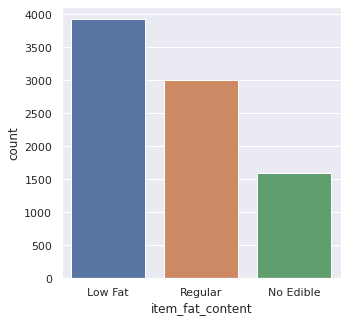

In [25]:
# plot item_fat_content
plt.figure(figsize=(5,5))
sns.countplot(x='item_fat_content', data=clean_data)
plt.show()

[Text(0, 0, 'Dairy'),
 Text(1, 0, 'Soft Drinks'),
 Text(2, 0, 'Meat'),
 Text(3, 0, 'Fruits and Vegetables'),
 Text(4, 0, 'Household'),
 Text(5, 0, 'Baking Goods'),
 Text(6, 0, 'Snack Foods'),
 Text(7, 0, 'Frozen Foods'),
 Text(8, 0, 'Breakfast'),
 Text(9, 0, 'Health and Hygiene'),
 Text(10, 0, 'Hard Drinks'),
 Text(11, 0, 'Canned'),
 Text(12, 0, 'Breads'),
 Text(13, 0, 'Starchy Foods'),
 Text(14, 0, 'Others'),
 Text(15, 0, 'Seafood')]

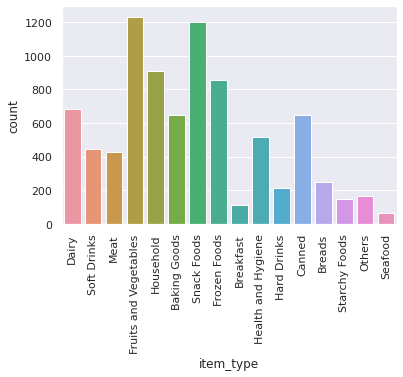

In [26]:
# plot item_type
labels = list(clean_data['item_type'].unique())
chart = sns.countplot(x=clean_data['item_type'])
chart.set_xticklabels(labels=labels, rotation=90)

[Text(0, 0, 'OUT049'),
 Text(1, 0, 'OUT018'),
 Text(2, 0, 'OUT010'),
 Text(3, 0, 'OUT013'),
 Text(4, 0, 'OUT027'),
 Text(5, 0, 'OUT045'),
 Text(6, 0, 'OUT017'),
 Text(7, 0, 'OUT046'),
 Text(8, 0, 'OUT035'),
 Text(9, 0, 'OUT019')]

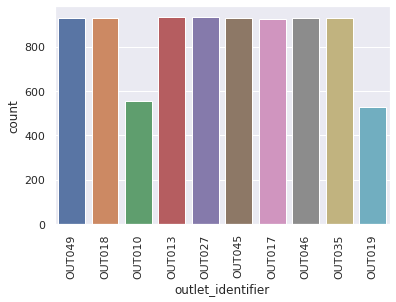

In [27]:
# plot outlet_identifier
labels = list(clean_data['outlet_identifier'].unique())
chart = sns.countplot(x=clean_data['outlet_identifier'])
chart.set_xticklabels(labels=labels, rotation=90)

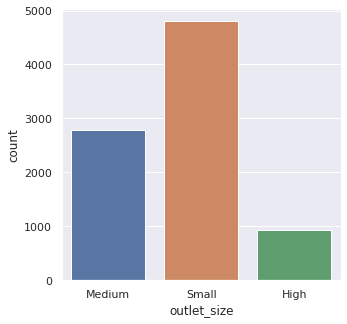

In [28]:
# plot outlet_size
plt.figure(figsize=(5,5))
sns.countplot(x='outlet_size', data=clean_data)
plt.show()

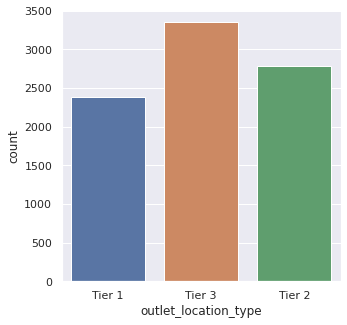

In [29]:
# plot outlet_location_type
plt.figure(figsize=(5,5))
sns.countplot(x='outlet_location_type', data=clean_data)
plt.show()

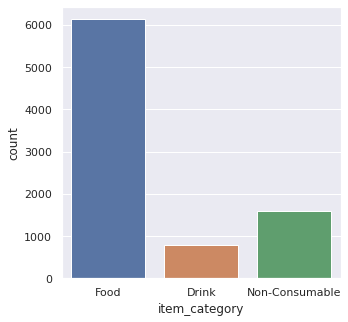

In [30]:
# plot item_category
plt.figure(figsize=(5,5))
sns.countplot(x='item_category', data=clean_data)
plt.show()

## **7.2. Plot data data distribution**

array([[<AxesSubplot:title={'center':'item_weight'}>,
        <AxesSubplot:title={'center':'item_visibility'}>],
       [<AxesSubplot:title={'center':'item_mrp'}>,
        <AxesSubplot:title={'center':'outlet_establishment_year'}>],
       [<AxesSubplot:title={'center':'item_outlet_sales'}>,
        <AxesSubplot:title={'center':'outlet_years'}>]], dtype=object)

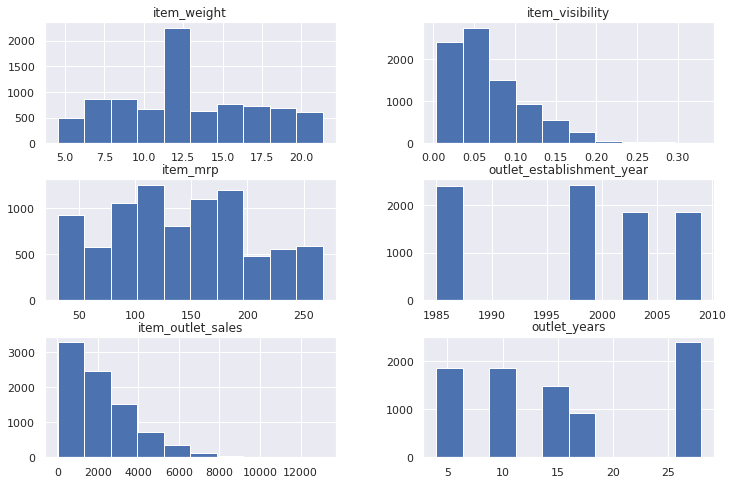

In [31]:
# data distribution of numerical values
clean_data.hist(figsize=(12,8))

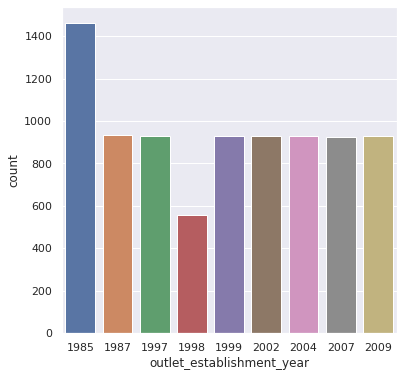

In [32]:
# outlet_establishment_year column count
plt.figure(figsize=(6,6))
sns.countplot(x='outlet_establishment_year', data=clean_data)
plt.show()

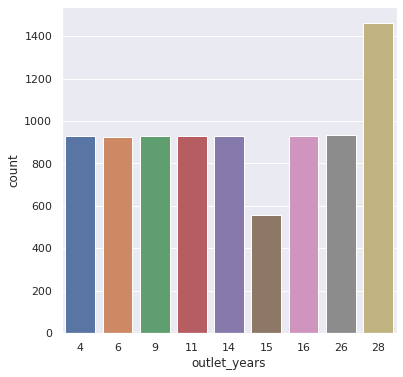

In [33]:
# outlet_years column count
plt.figure(figsize=(6,6))
sns.countplot(x='outlet_years', data=clean_data)
plt.show()

In [34]:
# correlation with the target column
corr_matrix = clean_data.corr()
corr_matrix['item_outlet_sales'].sort_values(ascending=False)

item_outlet_sales            1.000000
item_mrp                     0.567574
outlet_years                 0.049135
item_weight                  0.011550
outlet_establishment_year   -0.049135
item_visibility             -0.134138
Name: item_outlet_sales, dtype: float64

<AxesSubplot:>

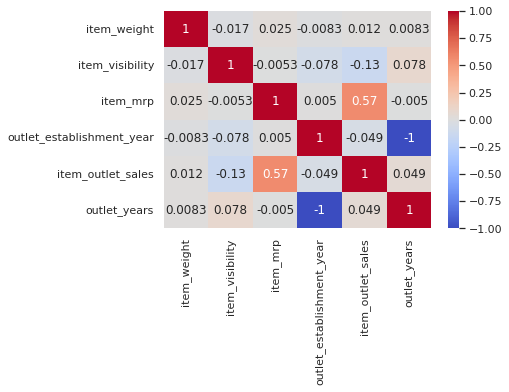

In [35]:
# plot correlations
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

<AxesSubplot:xlabel='item_mrp', ylabel='item_outlet_sales'>

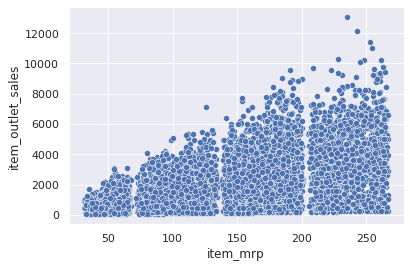

In [36]:
# scatter plot of item_mrp and item_outlet_sales
sns.scatterplot(data=clean_data, x='item_mrp', y='item_outlet_sales')

## **Notes:**
* The data present some minor changes based on what was done in the previous step.
* Some of the categorical features are not well distributed, the model can present some bias toward the most repetitive ones.
* There is not a clear correlation with the numerical features, _'item_mrp'_ seems to be the most essential feature to estimate the _'item_outlet_sales'_.

# **8. Data Pre-processing.**

In [37]:
# how the data looks like
clean_data.head()

,item_identifier,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_identifier,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,item_outlet_sales,item_category,outlet_years
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Food,14
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Drink,4
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Food,14
3,FDX07,19.20,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,Food,15
4,NCD19,8.93,No Edible,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Non-Consumable,26


In [38]:
# applying label encoding to some features
encoder = LabelEncoder()

cols_to_encode = ['item_identifier', 'item_type', 'outlet_identifier']

for col in cols_to_encode:
    clean_data[col] = encoder.fit_transform(clean_data[col])

In [39]:
# applying one-hot encoding to some features
clean_data = pd.get_dummies(clean_data, columns=['item_fat_content', 'outlet_size', 'outlet_location_type', 'outlet_type', 'item_category'])

In [40]:
# how the data looks like
clean_data.head()

,item_identifier,item_weight,item_visibility,item_type,item_mrp,outlet_identifier,outlet_establishment_year,item_outlet_sales,outlet_years,item_fat_content_Low Fat,...,outlet_location_type_Tier 1,outlet_location_type_Tier 2,outlet_location_type_Tier 3,outlet_type_Grocery Store,outlet_type_Supermarket Type1,outlet_type_Supermarket Type2,outlet_type_Supermarket Type3,item_category_Drink,item_category_Food,item_category_Non-Consumable
0,156,9.30,0.016047,4,249.8092,9,1999,3735.1380,14,1,...,1,0,0,0,1,0,0,0,1,0
1,8,5.92,0.019278,14,48.2692,3,2009,443.4228,4,0,...,0,0,1,0,0,1,0,1,0,0
2,662,17.50,0.016760,10,141.6180,9,1999,2097.2700,14,1,...,1,0,0,0,1,0,0,0,1,0
3,1121,19.20,0.066132,6,182.0950,0,1998,732.3800,15,0,...,0,0,1,1,0,0,0,0,1,0
4,1297,8.93,0.066132,9,53.8614,1,1987,994.7052,26,0,...,0,0,1,0,1,0,0,0,0,1


# **9. Defining The Input Data**

In [41]:
# setting model input and target variables
X = clean_data.drop(columns=['outlet_establishment_year', 'item_outlet_sales'])
y = clean_data['item_outlet_sales']

# **10. Exploring Different Models**

In [42]:
# df to store model error and scores
model_scores = pd.DataFrame(columns=['model', 'rmse', 'r2_score'])

In [43]:
def train_and_evaluate_model(model_name, model, X, y):
    '''
    Create a training pipeline to scale and train the model
    using the input data, then evaluate the model and safe its error
    and score in the scores dataframe.
    '''
    # split the data
    X_train, X_validate, y_train, y_validate = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # create a training pipeline
    pipeline = make_pipeline(StandardScaler(), model)
    
    # apply scaling on training data and train the model
    pipeline.fit(X_train, y_train)
    
    # predict the validation set
    y_hat = pipeline.predict(X_validate)
    
    # evaluate the model
    rmse = np.sqrt(mean_squared_error(y_validate, y_hat))
    model_score = r2_score(y_validate, y_hat)
    
    # adding error and score, to the scores datafrane
    model_scores.loc[len(model_scores)] = [model_name, rmse, model_score]
    
    print('----------------------------------')
    print(model_name, ' Report:')
    print('----------------------------------')
    print('RMSE: ', rmse)
    print('R2 Score: ', model_score)

## **10.1. Linear Regression**

In [44]:
# linear regression
linear_regression_model = LinearRegression()
train_and_evaluate_model('Linear Regression', linear_regression_model, X, y)

----------------------------------
Linear Regression  Report:
----------------------------------
RMSE:  1067.2642801267802
R2 Score:  0.5809177379747945


## **10.2. Ridge Regularization**

In [45]:
# ridge
ridge_model = Ridge()
train_and_evaluate_model('Ridge', ridge_model, X, y)

----------------------------------
Ridge  Report:
----------------------------------
RMSE:  1067.6091017911338
R2 Score:  0.5806468922426142


## **10.3. Lasso Regularization**

In [46]:
# lasso
lasso_model = Lasso()
train_and_evaluate_model('Lasso', lasso_model, X, y)

----------------------------------
Lasso  Report:
----------------------------------
RMSE:  1068.86069667095
R2 Score:  0.5796630717460309


## **10.4. SVM**

In [47]:
# svm
svr_model = SVR()
train_and_evaluate_model('SVM', svr_model, X, y)

----------------------------------
SVM  Report:
----------------------------------
RMSE:  1604.6102486835202
R2 Score:  0.05268491297800837


## **10.5. Decision Tree**

In [48]:
# decision tree
dtr_model = DecisionTreeRegressor()
train_and_evaluate_model('Decision Tree', dtr_model, X, y)

----------------------------------
Decision Tree  Report:
----------------------------------
RMSE:  1476.8862727637825
R2 Score:  0.19749187473826535


## **10.6. Random Forest**

In [49]:
# random forest
rfr_model = RandomForestRegressor()
train_and_evaluate_model('Random Forest', rfr_model, X, y)

----------------------------------
Random Forest  Report:
----------------------------------
RMSE:  1097.0194616621618
R2 Score:  0.5572240790850308


## **10.7. XGBoost**

In [50]:
# xgboost
xgbr_model = XGBRegressor()
train_and_evaluate_model('XGBoost', xgbr_model, X, y)

----------------------------------
XGBoost  Report:
----------------------------------
RMSE:  1132.1795888659562
R2 Score:  0.5283867776217697


## **10.8. Model Score Summary**

In [51]:
# display model scores
model_scores

,model,rmse,r2_score
0,Linear Regression,1067.264280,0.580918
1,Ridge,1067.609102,0.580647
2,Lasso,1068.860697,0.579663
3,SVM,1604.610249,0.052685
4,Decision Tree,1476.886273,0.197492
5,Random Forest,1097.019462,0.557224
6,XGBoost,1132.179589,0.528387


## **Notes:**
Based on the model score table, the model that best fits this problem that presents the lowest RMSE and highest Score is **Linear Regression**.

# **11. Testing The Chosen Model**

To test the model, article with id FDW58 was chosen, using the machine learning model, it will be estimated in which of the different outlets the article will generate the greatest number of sales.

## **11.1 Train the model with all the training data**

In [52]:
# train a Linear Regression model with all the data
model_pipeline = make_pipeline(StandardScaler(), LinearRegression())
model_pipeline.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

## **11.2. Reading and preparing the test data**

In [53]:
# loading the test data
test_data=pd.read_csv('/kaggle/input/big-mart-sales-prediction-datasets/test.csv')
test_data=test_data.loc[test_data['Item_Identifier'] == 'FDW58']
test_data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.75,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
253,FDW58,20.75,Low Fat,0.007596,Snack Foods,104.4622,OUT017,2007,NaN,Tier 2,Supermarket Type1
1625,FDW58,20.75,Low Fat,0.007584,Snack Foods,107.0622,OUT018,2009,Medium,Tier 3,Supermarket Type2
1892,FDW58,20.75,Low Fat,0.000000,Snack Foods,105.9622,OUT046,1997,Small,Tier 1,Supermarket Type1
2166,FDW58,20.75,Low Fat,0.007568,Snack Foods,105.8622,OUT045,2002,NaN,Tier 2,Supermarket Type1
2434,FDW58,NaN,Low Fat,0.007517,Snack Foods,107.6622,OUT027,1985,Medium,Tier 3,Supermarket Type3
2830,FDW58,NaN,Low Fat,0.013224,Snack Foods,106.4622,OUT019,1985,Small,Tier 1,Grocery Store


**Important:** The same preprocessing that was done during training should be the same that need to be done to test the model as well as when the model is in production, the best way to do it is by creating a pipeline, in the notebook this preprocessing is done manually.

In [54]:

# format column names to be lower-case
new_col_names = [col.lower() for col in test_data.columns]
test_data.columns = new_col_names

# creating a new df to show the results of each datapoint at the end of the notebook
results = test_data[['item_identifier', 'outlet_identifier']]

# fill null values - item_weight
test_data['item_weight'].fillna(test_data['item_weight'].mean(), inplace=True)

# fill null values - outlet_size
missing_values = test_data['outlet_size'].isnull()
test_data.loc[missing_values, 'outlet_size'] = test_data.loc[missing_values, 'outlet_type'].apply(lambda x: outlet_size_mode_pt[x].outlet_size)

# replace 0s - item_visibility
test_data.loc[:,'item_visibility'].replace(to_replace=0,
                                            value=test_data['item_visibility'].mean(),
                                            inplace=True)

# create a new feature - item_category
test_data['item_category'] = test_data['item_identifier'].apply(lambda x: x[:2])
test_data['item_category'] = test_data['item_category'].replace({'FD':'Food', 'DR':'Drink', 'NC':'Non-Consumable'})

# create a new feature - outlet_years
test_data['outlet_years'] = 2013 - test_data['outlet_establishment_year']

# applying one-hot encoding to some features
test_data = pd.get_dummies(test_data, columns=['item_fat_content', 'outlet_size', 'outlet_location_type', 'outlet_type', 'item_category'])


test_data['item_identifier'] = test_data['item_identifier'].replace({'FDW58': 1114})
test_data['item_type'] = test_data['item_type'].replace({'Snack Foods': 13})
test_data['outlet_identifier'] = test_data['outlet_identifier'].replace({'OUT049': 9,
                                                                         'OUT017': 2,
                                                                         'OUT018': 3,
                                                                         'OUT046': 8,
                                                                         'OUT045': 7,
                                                                         'OUT027': 5,
                                                                         'OUT019': 4})


test_data['item_fat_content_No Edible'] = 0
test_data['item_fat_content_Regular'] = 0
test_data['outlet_size_High'] = 0
test_data['item_category_Drink'] = 0
test_data['item_category_Non-Consumable'] = 0

# drop unnecessary features
test_data = test_data.drop(columns=['outlet_establishment_year'])

# IMPORTANT: The features must match the same order as the training data
# re-order columns
test_data = test_data[['item_identifier',
                       'item_weight',
                       'item_visibility',
                       'item_type',
                       'item_mrp',
                       'outlet_identifier',
                       'outlet_years',
                       'item_fat_content_Low Fat',
                       'item_fat_content_No Edible',
                       'item_fat_content_Regular',
                       'outlet_size_High',
                       'outlet_size_Medium',
                       'outlet_size_Small',
                       'outlet_location_type_Tier 1',
                       'outlet_location_type_Tier 2',
                       'outlet_location_type_Tier 3',
                       'outlet_type_Grocery Store',
                       'outlet_type_Supermarket Type1',
                       'outlet_type_Supermarket Type2',
                       'outlet_type_Supermarket Type3',
                       'item_category_Drink',
                       'item_category_Food',
                       'item_category_Non-Consumable']]

In [55]:
# predict the testing data
y_hat = model_pipeline.predict(test_data)

# displaying results
results['prediction'] = y_hat
results

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,item_identifier,outlet_identifier,prediction
0,FDW58,OUT049,1862.958268
253,FDW58,OUT017,1816.454798
1625,FDW58,OUT018,1476.624681
1892,FDW58,OUT046,1735.836885
2166,FDW58,OUT045,1666.463500
2434,FDW58,OUT027,3212.870698
2830,FDW58,OUT019,-148.948246



As shown in the previous data frame, based on the model prediction the store where the greatest profit from the sale of the product **FDW58** would be obtained is **OUT027**.